# 集成学习 - 随机森林（B站公开课课件）

In [2]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib as mlp
import seaborn as sns
import re, pip, conda

In [2]:
for package in [sklearn,mlp,np,pd,sns,pip,conda]:
    print(re.findall("([^']*)",str(package))[2],package.__version__)

sklearn 1.0.1
matplotlib 3.4.3
numpy 1.20.3
pandas 1.3.4
seaborn 0.11.2
pip 21.3.1
conda 4.10.3


In [3]:
#pip install --upgrade scikit-learn
#conda update scikit-learn

**目录**

<font color=green>**【公开课】**</font>一 集成学习的三大关键领域<br>
<font color=green>**【公开课】**</font>二 Bagging方法的基本思想<br>
<font color=green>**【公开课】**</font>三 随机森林RandomForest<br>
<font color=green>**【公开课】**</font>&emsp; 1 RamdomForestRegressor的实现<br>
<font color=red>**【完整版】**</font>&emsp; 2 随机森林回归器的参数<br>
<font color=red>**【完整版】**</font>&emsp;&emsp; 2.1 弱分类器结构<br>
<font color=red>**【完整版】**</font>&emsp;&emsp; 2.2 弱分类器数量<br>
<font color=red>**【完整版】**</font>&emsp;&emsp; 2.3 弱分类器训练的数据<br>
<font color=red>**【完整版】**</font>&emsp;&emsp; 2.4 其他参数<br>
<font color=red>**【完整版】**</font>四 随机森林的参数空间与自动优化<br>
<font color=green>**【公开课】**</font>五 增量学习：随机森林处理巨量数据<br>
<font color=green>**【公开课】**</font>&emsp; 1 普通学习vs增量学习<br>
<font color=red>**【完整版】**</font>&emsp; 2 增量学习在Kaggle数据上的应用<br>
<font color=red>**【完整版】**</font>六 原理进阶：Bagging方法6大面试热点问题<br>

**完整版内容可联系vx号littlebird_0228获得！请享受课程吧~**

# 一 集成学习的三大关键领域

集成学习（Ensemble learning）是机器学习中最先进、最有效、最具研究价值的领域之一，这类方法会训练多个弱评估器（base estimators）、并将它们输出的结果以某种方式结合起来解决一个问题。

在过去十年中，人工智能相关产业蓬勃发展，计算机视觉、自然语言处理、语音识别等领域不断推陈出新、硕果累累，但热闹是深度学习的，机器学习好似什么也没有。2012年之后，传统机器学习占据的搜索、推荐、翻译、各类预测领域都被深度学习替代或入侵，在招聘岗位中，69%的岗位明确要求深度学习技能，传统机器学习算法在这一场轰轰烈烈的人工智能热潮当中似乎有些被冷落了。

在人工智能大热的背后，集成学习就如同裂缝中的一道阳光，凭借其先进的思想、优异的性能杀出了一条血路，成为当代机器学习领域中最受学术界和产业界青睐的领域。

从今天的眼光来看，集成学习是：

- **当代工业应用中，唯一能与深度学习算法分庭抗礼的算法**<br><br>
- **数据竞赛高分榜统治者，KDDcup、Kaggle、天池、DC冠军队御用算法**<br><br>
- **在搜索、推荐、广告等众多领域，事实上的工业标准和基准模型**<br><br>
- **任何机器学习/深度学习工作者都必须掌握其原理、熟读其思想的领域**<br>

在集成学习的发展历程中，集成的思想以及方法启发了众多深度学习和机器学习方面的工作，在学术界和工业界都取得了巨大的成功。今天，集成学习可以被分为三个主要研究领域：

- **模型融合**<br>
    模型融合在最初的时候被称为“分类器结合”，这个领域主要关注强评估器，试图设计出强大的规则来融合强分类器的结果、以获取更好的融合结果。这个领域的手段主要包括了投票法Voting、堆叠法Stacking、混合法Blending等，且被融合的模型需要是强分类器。*模型融合技巧是机器学习/深度学习竞赛中最为可靠的提分手段之一，常言道：当你做了一切尝试都无效，试试模型融合。*<br><br>
- **弱分类器集成**<br>
    弱分类器集成主要专注于对传统机器学习算法的集成，这个领域覆盖了大部分我们熟悉的集成算法和集成手段，如装袋法bagging，提升法boosting。这个领域试图设计强大的集成算法、来将多个弱学习器提升成为强学习器。<br><br>
- **混合专家模型**（mixture of experts）<br>
    混合专家模型常常出现在深度学习（神经网络）的领域。在其他集成领域当中，不同的学习器是针对同一任务、甚至在同一数据上进行训练，但在混合专家模型中，我们将一个复杂的任务拆解成几个相对简单且更小的子任务，然后针对不同的子任务训练个体学习器（专家），然后再结合这些个体学习器的结果得出最终的输出。

在课程当中，我们将对弱分类器集成与模型融合两部分进行详细的说明，混合专家模型我们将会在案例中有专门的讲解。

# 二 Bagging方法的基本思想

Bagging又称为“装袋法”，它是所有集成学习方法当中最为著名、最为简单、也最为有效的操作之一。

在Bagging集成当中，我们并行建立多个弱评估器（通常是决策树，也可以是其他非线性算法），并综合多个弱评估器的结果进行输出。当集成算法目标是回归任务时，集成算法的输出结果是弱评估器输出的结果的平均值，当集成算法的目标是分类任务时，集成算法的输出结果是弱评估器输出的结果少数服从多数。

举例来说，假设现在一个bagging集成算法当中有7个弱评估器，对任意一个样本而言，输出的结果如下：

In [4]:
#分类的情况：输出7个弱评估器上的分类结果（0，1，2）
r_clf = np.array([0,2,1,1,2,1,0])

In [5]:
b_result_clf = np.argmax(np.bincount(r_clf))

In [6]:
b_result_clf #集成算法在现在的样本上应该输出的类别

1

- bincount会先将array由小到大进行排序，然后对每个数值进行计数，并返回计数结果的函数。需要注意的是，bincount函数不能接受负数输入。
- argmax是找到array中最大值，并返回最大值索引的函数

In [7]:
np.bincount(r_clf) #0类2个，1类3个，2类2个

array([2, 3, 2], dtype=int64)

In [8]:
np.bincount([3,0,2,1,1,2,1,0]) #0类2个，1类3个，2类2个，3类1个

array([2, 3, 2, 1], dtype=int64)

In [9]:
np.argmax(np.array([2, 3, 2]))
#不难发现，其返回的就是少数服从多数后数量最多的类别

1

In [10]:
#如果是二分类，涉及到有一些负数类别的，可以使用如下代码
r_clf = np.array([1,1,1,-1,-1,-1,-1])

In [11]:
(r_clf == 1).sum() #整个集成算法当中，输出为1的弱分类器的数量

3

In [12]:
(r_clf == -1).sum()

4

In [13]:
b_result_clf = 1 if (r_clf == 1).sum() > (r_clf != 1).sum() else -1

In [14]:
b_result_clf

-1

In [15]:
#如果评估器的数量是偶数，而少数和多数刚好一致怎么办？
r_clf = np.array([1,1,1,0,0,0,2,2])

- 从数量一致的类别中随机返回一个类别（需要进行随机设置）
- 从数量一致的类别中，返回编码数字更小的类别（如果使用argmax函数）

In [16]:
#回归的情况：输出7个弱评估器上的回归结果
r_reg = np.array([-2.082, -0.601, -1.686, -1.001, -2.037, 0.1284, 0.8500])

In [17]:
b_result_reg = r_reg.mean()

In [18]:
b_result_reg

-0.9183714285714285

在sklearn当中，我们可以接触到两个Bagging集成算法，一个是随机森林（RandomForest），另一个是极端随机树（ExtraTrees），他们都是以决策树为弱评估器的有监督算法，可以被用于分类、回归、排序等各种任务。同时，我们还可以使用bagging的思路对其他算法进行集成，比如使用装袋法分类的类BaggingClassifier对支持向量机或逻辑回归进行集成。在课程当中，我们将重点介绍随机森林的原理与用法。

|Bagging算法|集成类|
|:--:|:--:|
|随机森林分类|RandmForestClassifier|
|随机森林回归|RandomForestRegressor|
|极端随机树分类|ExtraTreesClassifier|
|极端随机树回归|ExtraTreesRegressor|
|装袋法分类|BaggingClassifier|
|装袋法回归|BaggingRegressor|

# 三 随机森林RandomForest

随机森林是机器学习领域最常用的算法之一，其算法构筑过程非常简单：**从提供的数据中随机抽样出不同的子集，用于建立多棵不同的决策树，并按照Bagging的规则对单棵决策树的结果进行集成（回归则平均，分类则少数服从多数）**。只要你充分掌握了决策树的各项属性和参数，随机森林的大部分内容都相当容易理解。

虽然原理上很简单，但随机森林的学习能力异常强大、算法复杂度高、又具备一定的抗过拟合能力，是从根本上来说比单棵决策树更优越的算法。即便在深入了解机器学习的各种技巧之后，它依然是我们能够使用的最强大的算法之一。原理如此简单、还如此强大的算法在机器学习的世界中是不常见的。**在机器学习竞赛当中，随机森林往往是我们在中小型数据上会尝试的第一个算法**。

在sklearn中，随机森林可以实现回归也可以实现分类。随机森林回归器由类`sklearn.ensemble.RandomForestRegressor`实现，随机森林分类器则有类`sklearn.ensemble.RandomForestClassifier`实现。我们可以像调用逻辑回归、决策树等其他sklearn中的算法一样，使用“实例化、fit、predict/score”三部曲来使用随机森林，同时我们也可以使用sklearn中的交叉验证方法来实现随机森林。其中回归森林的默认评估指标为R2，分类森林的默认评估指标为准确率。

*class* `sklearn.ensemble.RandomForestRegressor`(n_estimators=100, *, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)

*class* `sklearn.ensemble.RandomForestClassifier`(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)

不难发现，随机森林回归器和分类器的参数高度一致，因此我们只需要讲解其中一个类即可。**任意集成算法在发源时都是回归类算法，因此我们的重点将会放在回归类算法上**。随机森林有大量的参数，幸运的是，随机森林中所有参数都有默认值，因此即便我们不学习任何参数，也可以调用随机森林算法。我们先来建一片森林看看吧：

## 1 RandomForestRegressor的实现

In [3]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.model_selection import cross_validate, KFold
#这里我们不再使用cross_val_score，转而使用能够输出训练集分数的cross_validate
#决策树本身就是非常容易过拟合的算法，而集成模型的参数量/复杂度很难支持大规模网格搜索
#因此对于随机森林来说，一定要关注算法的过拟合情况

In [5]:
data = pd.read_csv(r"D:\Pythonwork\2021ML\PART 2 Ensembles\datasets\House Price\train_encode.csv",index_col=0)

In [6]:
data.head()

,Id,住宅类型,住宅区域,街道接触面积(英尺),住宅面积,街道路面状况,巷子路面状况,住宅形状(大概),住宅现状,水电气,...,泳池面积,泳池质量,篱笆质量,其他配置,其他配置的价值,销售月份,销售年份,销售类型,销售状态,SalePrice
0,0.0,5.0,3.0,36.0,327.0,1.0,0.0,3.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,8.0,4.0,208500
1,1.0,0.0,3.0,51.0,498.0,1.0,0.0,3.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,1.0,8.0,4.0,181500
2,2.0,5.0,3.0,39.0,702.0,1.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,8.0,2.0,8.0,4.0,223500
3,3.0,6.0,3.0,31.0,489.0,1.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8.0,0.0,140000
4,4.0,5.0,3.0,55.0,925.0,1.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,2.0,8.0,4.0,250000


In [7]:
data.shape

(1460, 81)

In [8]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [7]:
y #注意，y的类型是整数型，并且y的均值很大，可想而知整体的MSE一定会很大

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [25]:
y.mean()

180921.19589041095

In [26]:
X.shape

(1460, 80)

In [27]:
X.columns.tolist()

['Id',
 '住宅类型',
 '住宅区域',
 '街道接触面积(英尺)',
 '住宅面积',
 '街道路面状况',
 '巷子路面状况',
 '住宅形状(大概)',
 '住宅现状',
 '水电气',
 '住宅配置',
 '住宅视野',
 '社区',
 '住宅周边1',
 '住宅周边2',
 '适用家庭',
 '住宅房型',
 '装修质量',
 '整体质量',
 '建造年份',
 '法律拆除年份',
 '天花板类型',
 '天花板材料',
 '户外装饰1',
 '户外装饰2',
 '砖墙类型',
 '砖墙面积',
 '户外材料质量',
 '户外装修质量',
 '地下室类型',
 '地下室深度',
 '地下室质量',
 '花园外墙',
 '地下室现状1',
 '地下室一层标准面积',
 '地下室现状2',
 '地下室二层标准面积',
 '地下室建造现状',
 '整体地下室面积',
 '暖气类型',
 '暖气质量',
 '中央空调',
 '电力系统',
 '二楼面积',
 '三楼面积',
 '全低质量面积',
 '户外活动空间面积',
 '全卫地下室',
 '半卫地下室',
 '全卫及以上',
 '半卫及以上',
 '卧室及以上',
 '厨房及以上',
 '厨房质量',
 '总房间量',
 '住宅性能',
 '壁炉数量',
 '壁炉质量',
 '车库类型',
 '车库建造时间',
 '车库装修现状',
 '车位数量',
 '车库面积',
 '车库质量',
 '车库现状',
 '石板路',
 '木板面积',
 '开放式门廊面积',
 '关闭式门廊面积',
 '三季门廊面积',
 '半开放式门廊面积',
 '泳池面积',
 '泳池质量',
 '篱笆质量',
 '其他配置',
 '其他配置的价值',
 '销售月份',
 '销售年份',
 '销售类型',
 '销售状态']

In [28]:
reg_f = RFR() #实例化随机森林
reg_t = DTR() #实例化决策树
cv = KFold(n_splits=5,shuffle=True,random_state=1412) #实例化交叉验证方式

与sklearn中其他回归算法一样，随机森林的默认评估指标是R2，但在机器学习竞赛、甚至实际使用时，我们很少使用损失以外的指标对回归类算法进行评估。对回归类算法而言，最常见的损失就是MSE。

|cross_validate|参数|
|---|---|
|n_jobs|允许该程序调用的线程数|
|verbose|是否打印进度|

In [29]:
result_t = cross_validate(reg_t #要进行交叉验证的评估器
                          ,X,y #数据
                          ,cv=cv #交叉验证模式
                          ,scoring="neg_mean_squared_error" #评估指标
                          ,return_train_score=True #是否返回训练分数
                          ,verbose=True #是否打印进程
                          ,n_jobs=-1 #线程数
                         )

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.2s finished


你知道如何查看自己计算机的线程数吗？

In [30]:
result_f = cross_validate(reg_f,X,y,cv=cv,scoring="neg_mean_squared_error"
                          ,return_train_score=True
                          ,verbose=True
                          ,n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.1s finished


In [31]:
result_t #超级过拟合

{'fit_time': array([0.0220046 , 0.0220046 , 0.0220046 , 0.02100563, 0.02100468]),
 'score_time': array([0.00199962, 0.00199938, 0.00199938, 0.00199914, 0.00200129]),
 'test_score': array([-1.13534182e+09, -3.41485921e+09, -1.67088861e+09, -1.67895115e+09,
        -1.59034213e+09]),
 'train_score': array([-0., -0., -0., -0., -0.])}

In [32]:
result_f #训练集和测试在交叉验证上的分数差异更小，因此森林的过拟合程度没有决策树高

{'fit_time': array([1.31684232, 1.19581604, 1.27883458, 1.29583764, 1.21081877]),
 'score_time': array([0.01100278, 0.01100206, 0.01100206, 0.01100278, 0.0110023 ]),
 'test_score': array([-7.66379839e+08, -2.01798504e+09, -7.66327398e+08, -4.90163166e+08,
        -9.88309425e+08]),
 'train_score': array([-1.27164348e+08, -1.09165780e+08, -1.34679785e+08, -1.39727005e+08,
        -1.19699899e+08])}

**在集成学习中，我们衡量回归类算法的指标一般是RMSE（根均方误差），也就是MSE开根号后的结果**。现实数据的标签往往数字巨大、数据量庞杂，MSE作为平方结果会放大现实数据上的误差（例如随机森林结果中得到的，$7*10^8$等结果），因此我们会对平房结果开根号，让回归类算法的评估指标在数值上不要过于夸张。同样的，方差作为平方结果，在现实数据上也会太大，因此如果可以，我们使用标准差进行模型稳定性的衡量。

In [33]:
trainRMSE_f = abs(result_f["train_score"])**0.5
testRMSE_f = abs(result_f["test_score"])**0.5
trainRMSE_t = abs(result_t["train_score"])**0.5
testRMSE_t = abs(result_t["test_score"])**0.5

In [34]:
trainRMSE_f.mean()

11218.296933940535

In [35]:
testRMSE_f.mean()

30773.03828921106

In [36]:
trainRMSE_f.std() #方差数额太大，使用标准差

487.0084587022606

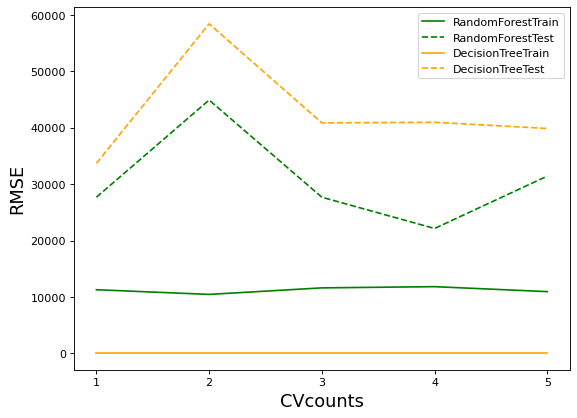

In [37]:
#默认值下随机森林的RMSE与标准差std
xaxis = range(1,6)
plt.figure(figsize=(8,6),dpi=80)
#RMSE
plt.plot(xaxis,trainRMSE_f,color="green",label = "RandomForestTrain")
plt.plot(xaxis,testRMSE_f,color="green",linestyle="--",label = "RandomForestTest")
plt.plot(xaxis,trainRMSE_t,color="orange",label = "DecisionTreeTrain")
plt.plot(xaxis,testRMSE_t,color="orange",linestyle="--",label = "DecisionTreeTest")
plt.xticks([1,2,3,4,5])
plt.xlabel("CVcounts",fontsize=16)
plt.ylabel("RMSE",fontsize=16)
plt.legend()
plt.show()

- 横坐标：交叉验证次数
- 纵坐标：RMSE数值

从图像来看，森林与决策树都处于过拟合状态，不过森林的过拟合程度较轻，决策树的过拟合程度较强。两个算法在训练集上的结果都比较优秀，决策树的可以完美学习训练集上的内容，达到RMSE=0的程度，而随机森林在训练集上的RMSE大约在1w上下徘徊，测试集上的结果则是随机森林更占优。**可见，与填写的参数无关，随机森林天生就是比决策树更不容易过拟合、泛化能力更强的**。

## 2 随机森林回归器的参数

### 2.1 弱分类器结构

### 2.2 弱分类器数量

### 2.3 弱分类器训练的数据

### 2.4 其他参数

# 四 集成算法的参数空间与网格优化

# 五 随机森林在巨量数据上的增量学习

集成学习是工业领域中应用最广泛的机器学习算法。实际工业环境下的数据量往往十分巨大，一个训练好的集成算法的复杂程度与训练数据量高度相关，因此企业在应用机器学习时通常会提供强大的计算资源作为支持，也因此当代的大部分集成算法都是支持GPU运算的（相对的，如果你发现一个算法在任何机器学习库中，都没有接入GPU运算的选项，这可能说明该算法在工业应用中基本不会被使用）。

sklearn作为早期开源的机器学习算法库，难以预料到如今人工智能技术走进千家万户的应用状况，因此并未开放接入GPU进行运算的接口，即sklearn中的所有算法都不支持接入更多计算资源。因此当我们想要使用随机森林在巨量数据上进行运算时，很可能会遭遇计算资源短缺的情况。幸运的是，我们有两种方式解决这个问题：

- 使用其他可以接入GPU的机器学习算法库实现随机森林，比如xgboost。
- 继续使用sklearn进行训练，但使用增量学习（incremental learning）。

增量学习是机器学习中非常常见的方法，在有监督和无监督学习当中都普遍存在。**增量学习允许算法不断接入新数据来拓展当前的模型，即允许巨量数据被分成若干个子集，分别输入模型进行训练**。

## 1 普通学习 vs 增量学习

- 普通学习

通常来说，当一个模型经过一次训练之后，如果再使用新数据对模型进行训练，原始数据训练出的模型会被替代掉。举个例子，我们原本的数据集X与y是kaggle房价数据集，结构为：

In [73]:
X.shape

(1460, 80)

In [53]:
y.shape

(1460,)

现在，我们导入sklearn中非常常用的另一个数据集，加利福尼亚房价数据集：

In [77]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error

In [78]:
X_fc = fetch_california_housing().data
y_fc = fetch_california_housing().target

In [82]:
X_fc.shape #可以看到，加利福尼亚房价数据集的特征量为8

(20640, 8)

建模，并在X_,y_基础上进行训练：

In [83]:
model = RFR(n_estimators=3, warm_start=False) #不支持增量学习的

In [84]:
model1 = model.fit(X_fc,y_fc)

In [85]:
#RMSE
(mean_squared_error(y_fc,model1.predict(X_fc)))**0.5

0.30123985583215596

In [86]:
#使用.estimators_查看森林中所有树的情况，可以看到每一棵树的随机数种子
model1.estimators_

[DecisionTreeRegressor(max_features='auto', random_state=1785210460),
 DecisionTreeRegressor(max_features='auto', random_state=121562514),
 DecisionTreeRegressor(max_features='auto', random_state=1271073231)]

此时，如果让model1继续在kaggle房价数据集X,y上进行训练：

In [87]:
model1 = model1.fit(X.iloc[:,:8],y)
#注意，X有80个特征，X_fc只有8个特征，输入同一个模型的数据必须结构一致

In [88]:
model1.estimators_ #你发现了吗？model1中原始的树消失了，新的树替代了原始的树

[DecisionTreeRegressor(max_features='auto', random_state=349555903),
 DecisionTreeRegressor(max_features='auto', random_state=1253222501),
 DecisionTreeRegressor(max_features='auto', random_state=2145441582)]

再让model1对加利福尼亚房价数据集进行训练，会发生什么呢？别忘了model1之前训练过加利福尼亚房价数据集：

In [90]:
#RMSE
(mean_squared_error(y_fc,model1.predict(X_fc)))**0.5

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


188517.0427626784

RMSE异常巨大，模型现在已经不具备任何预测y_fc的能力了。非常明显，model1中原始的树消失了，基于kaggle数据集训练的树**覆盖**了原始的树，因此model1不再对本来见过的加利福尼亚房价数据报有记忆。

sklearn的这一覆盖规则是交叉验证可以进行的基础，正因为每次训练都不会受到上次训练的影响，我们才可以使用模型进行交叉验证，否则就会存在数据泄露的情况。但在增量学习中，原始数据训练的树不会被替代掉，模型会一致记得之前训练过的数据，我们来看看详细情况：

- 增量学习

我们还是可以使用X,y以及X_fc,y_fc作为例子，这一次，我们让warm_start参数取值为True，允许随机森林进行增量学习：

In [91]:
model = RFR(n_estimators=3, warm_start=True) #支持增量学习

In [92]:
model2 = model.fit(X_fc,y_fc)

In [93]:
(mean_squared_error(y_fc,model2.predict(X_fc)))**0.5

0.30099931130927154

In [94]:
model2.estimators_

[DecisionTreeRegressor(max_features='auto', random_state=338470642),
 DecisionTreeRegressor(max_features='auto', random_state=1545812511),
 DecisionTreeRegressor(max_features='auto', random_state=740599321)]

让X和y在model2上继续进行训练：

In [95]:
model2 = model2.fit(X.iloc[:,:8],y)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:421: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


In [96]:
(mean_squared_error(y_fc,model2.predict(X_fc)))**0.5

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


0.30099931130927154

你发现了吗？即便已经对X和y进行了训练，但是model2中对加利福尼亚房价数据集的记忆还在，因此在对X_fc与y_fc进行预测时，依然能够取得不错的分数。

In [97]:
model2.estimators_ #在增量学习当中，树没有发生变化

[DecisionTreeRegressor(max_features='auto', random_state=338470642),
 DecisionTreeRegressor(max_features='auto', random_state=1545812511),
 DecisionTreeRegressor(max_features='auto', random_state=740599321)]

所以在增量学习当中，已经训练过的结果会被保留。对于随机森林这样的Bagging模型来说，这意味着之前的数据训练出的树会被保留，新数据会训练出新的树，新旧树互不影响。对于逻辑回归、神经网络这样不断迭代以求解权重$w$的算法来说，新数据训练时w的起点是之前的数据训练完毕之后的w。

不过，这里存在一个问题：虽然原来的树没有变化，但增量学习看起来并没有增加新的树——事实上，对于随机森林而言，我们需要手动增加新的树：

In [ ]:
model2.estimators_ #属性，反映训练完毕的模型的一些特点、一些客观存在的性质

In [98]:
#调用模型的参数，可以通过这种方式修改模型的参数，而不需要重新实例化模型
model2.n_estimators += 2 #增加2棵树，用于增量学习

In [99]:
model2

RandomForestRegressor(n_estimators=5, warm_start=True)

In [100]:
model2.fit(X.iloc[:,:8],y)

RandomForestRegressor(n_estimators=5, warm_start=True)

In [101]:
model2.estimators_ #原来的树还是没有变化，新增的树是基于新输入的数据进行训练的

[DecisionTreeRegressor(max_features='auto', random_state=338470642),
 DecisionTreeRegressor(max_features='auto', random_state=1545812511),
 DecisionTreeRegressor(max_features='auto', random_state=740599321),
 DecisionTreeRegressor(max_features='auto', random_state=1633155700),
 DecisionTreeRegressor(max_features='auto', random_state=623929223)]

## 2 增量学习在Kaggle数据上的应用

# 六 Bagging方法6大面试热点问题

本节，我们总结关于随机森林和bagging的几个重点面试问题，深入地探讨一下Bagging算法背后相关的原理，这对于我们理解后续模型融合中的Voting与Averaging方法有重要的意义。本节一共包括6个问题：

1、为什么Bagging算法的效果比单个评估器更好？<br>
2、为什么Bagging可以降低方差？<br>
3、Bagging有效的基本条件有哪些？Bagging的效果总是强于弱评估器吗？<br>
4、Bagging方法可以集成决策树之外的算法吗？<br>
5、怎样增强Bagging中弱评估器的独立性？<br>
6、除了随机森林，你还知道其他Bagging算法吗？<br>

### **Q1：为什么Bagging算法的效果比单个评估器更好？**

### **Q2：为什么Bagging可以降低方差？**

### **Q3：Bagging有效的基本条件有哪些？Bagging的效果总是强于弱评估器吗？**

### **Q4：Bagging方法可以集成决策树之外的算法吗？**

### **Q5：怎样增强Bagging中弱评估器的独立性？**

### **Q6：除了随机森林，你还知道其他Bagging算法吗？**